In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:

image_path = "cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

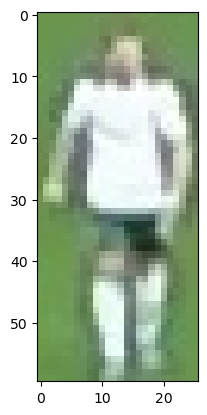

In [3]:
plt.imshow(image)
plt.show()

# take the top half of the image

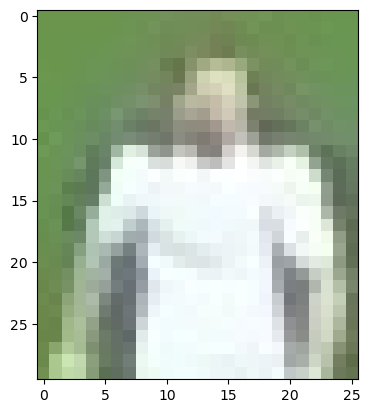

In [4]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

c:\Users\almog\miniconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


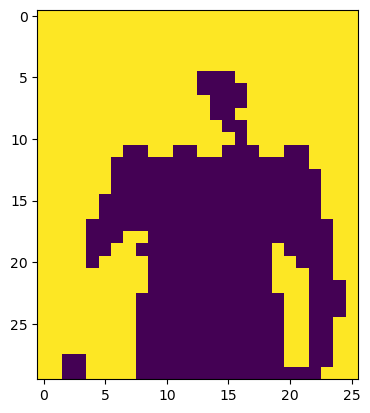

In [9]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]] # background color
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [13]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [14]:
kmeans.cluster_centers_[player_cluster]

array([229.87055016, 237.7961165 , 234.36569579])

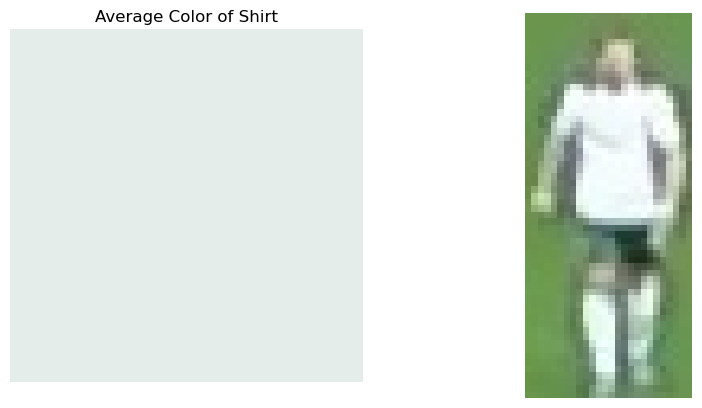

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming kmeans.cluster_centers_ and player_cluster are already defined
color = kmeans.cluster_centers_[player_cluster] / 255.0  # Normalize to [0, 1]

# Create an image of a square with the color
square = np.ones((100, 100, 3), dtype=np.float32) * color

# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the square with the color
axs[0].imshow(square)
axs[0].axis('off')  # Hide the axes
axs[0].set_title('Average Color of Shirt')

# Display the existing image
axs[1].imshow(image)
axs[1].axis('off')  # Hide the axes

# Show the figure
plt.show()